# Data Visualization Project - Netflix

In this exercise, I use 8000 Netflix data to demonstrate data visualization with EDA. The dataset is from [kaggle](https://www.kaggle.com/datasets/shivamb/netflix-shows).
<br/>So, I will going to 2 parts:
## [Part1: Data cleaning](#Part-1:-Data-cleaning)
Basic look of dataset, data cleaning, correct data type.

## [Part2: Visualization](#Part-2:-Visualization)
1. Overall Picture
2. Difference in Movies and TV Shows
3. Changes after 2019

---

In [479]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Part 1: Data cleaning

Let's first look at dataset

In [403]:
df = pd.read_csv("netflix_titles.csv")
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### 1-1: Deal with Null
It seems there are some NaN values, so we need to clean them. <br/>First, we check each attribute's NaN rate

In [404]:
check = True
for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))
        check = False
if check:
    print('Data Fram no null')

director null rate: 29.91%
cast null rate: 9.37%
country null rate: 9.44%
date_added null rate: 0.11%
rating null rate: 0.05%
duration null rate: 0.03%


Then, we clean country, cast, director.

In [405]:
# Replacments
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['cast'].replace(np.nan, 'No Data',inplace  = True)
df['director'].replace(np.nan, 'No Data',inplace  = True)

# Drops
df.dropna(inplace=True)

# Drop Duplicates
df.drop_duplicates(inplace= True)

df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Now, we check NaN rate again.

In [406]:
check = True
for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))
        check = False
if check:
    print('Data Fram no null')

Data Fram no null


### 1-2: Data type
Now, we check each attribute's data type.

In [407]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

It seems we need to do some works.
1. date_added should be datetime
2. create month_added (int), month_name_added (str), and year_added (int) attributes

In [408]:
df["date_added"] = pd.to_datetime(df['date_added'])

# Create month_added and year_added
df['month_added']=df['date_added'].dt.month
df['month_name_added']=df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year

In [409]:
df.dtypes

show_id                     object
type                        object
title                       object
director                    object
cast                        object
country                     object
date_added          datetime64[ns]
release_year                 int64
rating                      object
duration                    object
listed_in                   object
description                 object
month_added                  int64
month_name_added            object
year_added                   int64
dtype: object

It looks better now.

Now, I found some films have multiple countries. So, I create ['first_country'] and use first country as representive.
In addition, we also create another attribute to store genre list.

In [410]:
# Helper column for various plots
df['count'] = 1

# Lets retrieve just the first country
df['first_country'] = df['country'].apply(lambda x: x.split(",")[0])
df['first_country'].head()

# Genre
df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 

# Reducing name length
df['first_country'].replace('United States', 'USA', inplace=True)
df['first_country'].replace('United Kingdom', 'UK',inplace=True)
df['first_country'].replace('South Korea', 'S. Korea',inplace=True)

In [411]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added,count,first_country,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021,1,USA,[Documentaries]
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021,1,South Africa,"[International TV Shows, TV Dramas, TV Mysteries]"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,September,2021,1,USA,"[Crime TV Shows, International TV Shows, TV Ac..."
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,September,2021,1,USA,"[Docuseries, Reality TV]"
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,September,2021,1,India,"[International TV Shows, Romantic TV Shows, TV..."


Great! Now, I can start data visualization.

# Part 2: Visualization

In this part, we are interested in 3 sections:<br>
**[1. Overall Picture.](#Section-1:-Overall-Picture)**<br>
&emsp;I want to know does movies more then TV shows and vice versa on Netflix? What is the trend in the past few decades and which country has more movies and TV shows?<br>
**[2. Difference in Movies and TV Shows.](#Section-2:-Difference-in-Movies-and-TV-Shows)**<br>
&emsp;What kind of difference between movies and TV Shows?<br>
**[3. What change after 2019?](#Section-3:-Changes-after-2019)**<br>
&emsp;I find that the total numbers decrease after 2018, I want to the reason why it decreases? Maybe data visualization can help me to find the answer.


In [412]:
# Define color
color_movie = '#b20710'
color_TV = '#221f1f'

## Section 1: Overall Picture
Now, we want to have basic overlook about our data. 

### The first question is: 

What is the percentage of movies and TV shows on Netflix?

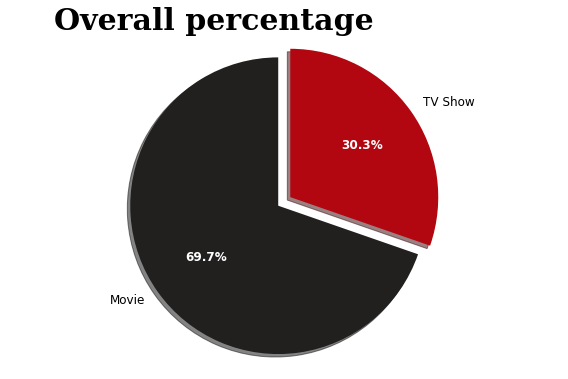

In [413]:
col = "type"
grouped = df[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

#Plot pie chart
fig, ax = plt.subplots(1,1,figsize=(8,5))
textprops=dict(size=12)

patches, texts, pcts = ax.pie(grouped['count'], explode = (0.1,0), colors = [color_TV, color_movie],textprops=textprops, labels = grouped['type'], shadow=True, startangle=90, autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.setp(pcts, color='white',fontweight='bold') # Modify text in pie chart
plt.setp(texts, fontweight='500')

#Add title
fig.text(0.10, 0.98, 'Overall percentage', fontsize=30, fontweight='bold', fontfamily='Serif')   

fig.tight_layout()
plt.show()

Clearly, almost 70% moives on Netflix

### What is the current trend by years in movies and TV shows?
Netflix releases a hundreds movies and TV shows every year and we want to see its trend in the past few decades.

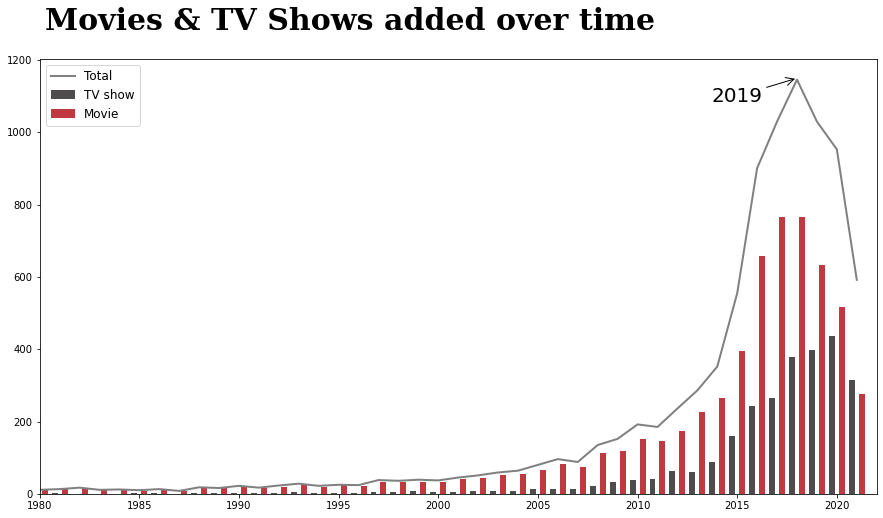

In [414]:
col = 'release_year'
df1 = df[df['release_year'] >= 1980]

df_sortYear = df1[col].value_counts().reset_index()
df_sortYear = df_sortYear.rename(columns = {col:'Total', 'index':col})
df_sortYear = df_sortYear.sort_values(col)

df_TVs = df1[df1['type'] == 'TV Show']
df_Movies = df1[df1['type'] == 'Movie']

df_sortYear_TVs = df_TVs[col].value_counts().reset_index()
df_sortYear_TVs = df_sortYear_TVs.rename(columns = {col:'TV show', 'index':col})
df_sortYear_TVs = df_sortYear_TVs.sort_values(col)

df_sortYear_Movies = df_Movies[col].value_counts().reset_index()
df_sortYear_Movies = df_sortYear_Movies.rename(columns = {col:'Movie', 'index':col})
df_sortYear_Movies = df_sortYear_Movies.sort_values(col)

df_total = pd.merge(df_sortYear, df_sortYear_TVs, how = 'left', left_on = 'release_year', right_on = 'release_year')
df_total = pd.merge(df_total, df_sortYear_Movies, how = 'left', left_on = 'release_year', right_on = 'release_year')

fig, ax1 = plt.subplots(1,1,figsize = (15,8))
width = 0.5
ax1.plot(df_total[col], df_total['Total'], label = 'Total', linewidth = 2, color = 'grey')
ax1.bar(df_total[col] - width/2, df_total['TV show'], alpha = 0.8, width = 0.3, label = 'TV show', color = color_TV)
ax1.bar(df_total[col] + width/2, df_total['Movie'], alpha = 0.8, width = 0.3, label = 'Movie', color = color_movie)

fig.text(0.13, 0.93, 'Movies & TV Shows added over time', fontsize=30, fontweight='bold', fontfamily='Serif') 
ax1.legend(loc = 'upper left', fontsize = 'large')

ax1.annotate("2019",
            xy=(2018, 1150),
            xytext=(2015, 1100),
            xycoords='data',
            size=20, va="center", ha="center",
            arrowprops=dict(arrowstyle="->",fc="black"))

plt.xlim([1980,2022])
plt.show()

From this result, we can see most of films are release in the past 10 years.<br/>
Besides, it seems Netflix pays more contents on movies than TV shows.<br/>
However, it seems the content addition has slowed down after 2019, likely due to COVID-19.


### Which country has the most Contents?

We all know that Netflix offers world wide stream media and we want to know which country has the most contents on Netflix.

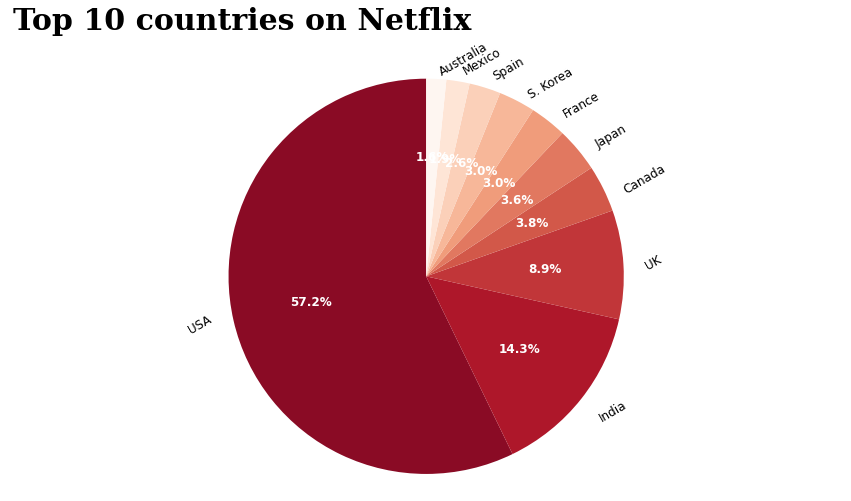

In [415]:
col = "first_country"
countries_grouped = df[col].value_counts().reset_index()
countries_grouped = countries_grouped.rename(columns = {col : "count", "index" : col}).head(10)

#Plot pie chart
fig, ax = plt.subplots(1,1,figsize=(15,8))
textprops=dict(size=12)
# explode = (0.1,0)

patches, texts, pcts = ax.pie(countries_grouped['count'], labels = countries_grouped['first_country'],
                              colors=sns.color_palette("RdGy", n_colors=20),
                              textprops = textprops,shadow=False, startangle=90, 
                              autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.setp(pcts, color='white',fontweight='bold') # Modify text in pie chart
plt.setp(texts, fontweight='500')
[t.set_rotation(30) for t in texts]

#Add title
fig.text(0.13, 0.93, 'Top 10 countries on Netflix', fontsize=30, fontweight='bold', fontfamily='Serif')   

plt.show()

Clearly, the most prolific countries on Netflix are the USA, with India and the UK. The USA and the UK are in line with expectations.<br/>
Nevertheless, it is surprisingly that India is second large country of the contents on Netflix.

---

## Section 2: Difference in Movies and TV Shows

### Ratings distribution
After basic views on our data, now we want to know some difference between movies and TV shows.<br/>
Let's briefly check out how ratings are distributed

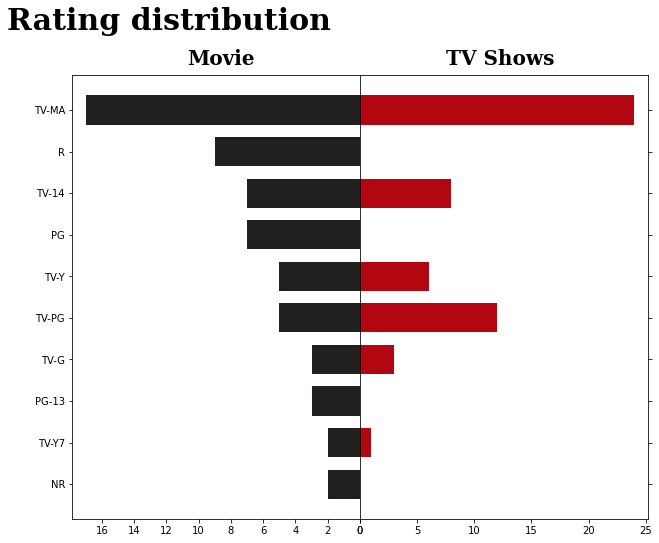

In [465]:
# Rating by TV show and movie
col = 'rating'
df_TVs_rat = df_TVs[col].value_counts().reset_index()
df_TVs_rat = df_TVs_rat.rename(columns = {col: 'TV show', 'index': col})
df_Movies_rat = df_Movies[col].value_counts().reset_index()
df_Movies_rat = df_Movies_rat.rename(columns = {col: 'Movie', 'index': col})
df_total_rat = pd.merge(df_Movies_rat, df_TVs_rat, how = 'left', left_on = 'rating', right_on = 'rating').sort_values(by='Movie',ascending=False)[::-1]

fig, axes = plt.subplots(ncols = 2, sharey = True, figsize = (10,7))
axes[0].barh(df_total_rat[col], df_total_rat['Movie'], align = 'center', color = color_TV, height = 0.7)
axes[1].barh(df_total_rat[col], df_total_rat['TV show'], align = 'center', color = color_movie, height = 0.7)
axes[0].invert_xaxis()
axes[1].yaxis.tick_right()
axes[0].yaxis.set_offset_position('right')

fig.text(0.01, 1.07, 'Rating distribution', fontsize=30, fontweight='bold', fontfamily='Serif')   
fig.text(0.26, 1.00, 'Movie', fontsize=20, fontweight='bold', fontfamily='Serif')   
fig.text(0.62, 1.00, 'TV Shows', fontsize=20, fontweight='bold', fontfamily='Serif')  
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.98, wspace=0.)
plt.show()


Obviously, some ratings are only applicable to Movies.<br/> 
The most common rating for both Movies & TV Shows is TV-MA.

### Movies and TV Shows in top 10 countries
In top 10 countries, we want to see do they have different preference on contents?

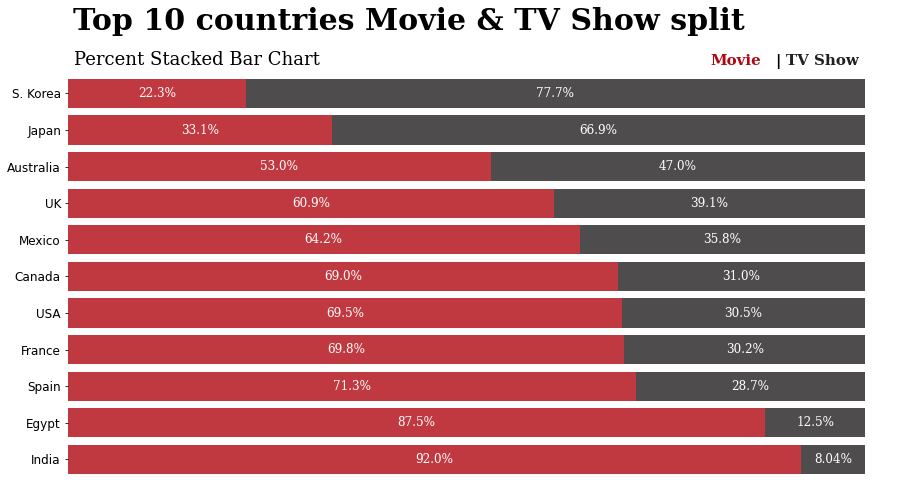

In [420]:
country_order = df['first_country'].value_counts()[:11].index
data_q2q3 = df[['type', 'first_country']].groupby('first_country')['type'].value_counts().unstack().loc[country_order]
data_q2q3['sum'] = data_q2q3.sum(axis=1)
data_q2q3_ratio = (data_q2q3.T / data_q2q3['sum']).T[['Movie', 'TV Show']].sort_values(by='TV Show',ascending=False)[::-1]

fig, ax = plt.subplots(1,1,figsize=(15, 8))
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Movie'], alpha=0.8, color = color_movie, label = 'Movie')
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['TV Show'], left=data_q2q3_ratio['Movie'], alpha=0.8, color = color_TV, label = 'TV Shows')
ax.set_xticks([])
ax.tick_params(axis='both', which='major', labelsize=12)

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['Movie'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')

for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['TV Show'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Movie'][i]+data_q2q3_ratio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')    
    
fig.text(0.13, 0.93, 'Top 10 countries Movie & TV Show split', fontsize=30, fontweight='bold', fontfamily='Serif')   
fig.text(0.131, 0.87, 'Percent Stacked Bar Chart', fontsize=18,fontfamily='Serif')  

fig.text(0.72,0.87,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color=color_movie)
fig.text(0.78,0.87,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.79,0.87,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color=color_TV)

plt.show()

From this plot, we can see very interesing preference in top 10 countries.<br/>

South Korea is dominated by TV Shows and it is not surprising result. Just see how Squid Game popular in 2021.<br/>

On the other hands, India is dominated by Movies. It might be due to Bollywood.

---

## Section 3: Changes after 2019

### Comparison to previous year
In the beginning, we find the content becomes decrease since 2019. Now, we want to check it in detail.<br>
First, we compare the number of movies and TV shows from the previous year.

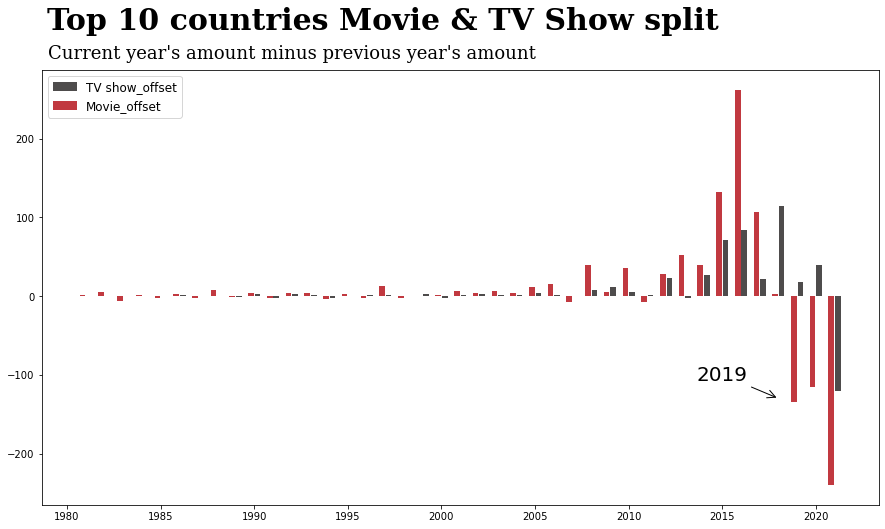

In [421]:
col = 'release_year'
df_total['Total_offset'] = df_total['Total'] - df_total['Total'].shift(1)
df_total['TV show_offset'] = df_total['TV show'] - df_total['TV show'].shift(1)
df_total['Movie_offset'] = df_total['Movie'] - df_total['Movie'].shift(1)

fig, ax = plt.subplots(1,1,figsize = (15,8))
width = 0.35
ax.bar(df_total['release_year'] + width/2, df_total['TV show_offset'], alpha = 0.8,
       label = 'TV show_offset', width = 0.3, color = color_TV)
ax.bar(df_total['release_year'] - width/2, df_total['Movie_offset'], alpha = 0.8, 
       label = 'Movie_offset', width = 0.3, color = color_movie)
ax.legend(loc = 'upper left', fontsize = 'large')

fig.text(0.13, 0.95, 'Top 10 countries Movie & TV Show split', fontsize=30, fontweight='bold', fontfamily='Serif') 
fig.text(0.131, 0.90, 'Current year\'s amount minus previous year\'s amount', fontsize=18,fontfamily='Serif')  

ax.annotate("2019",
            xy=(2018, -130),
            xytext=(2015, -100),
            xycoords='data',
            size=20, va="center", ha="center",
            arrowprops=dict(arrowstyle="->",fc="black"))

plt.show()

It is clearly that the number of movie decreases dratically since 2019 because COVID-19 influenced film industry.<br>

### Content released trend by country
Then, we want to know if every contries' content have decreased.

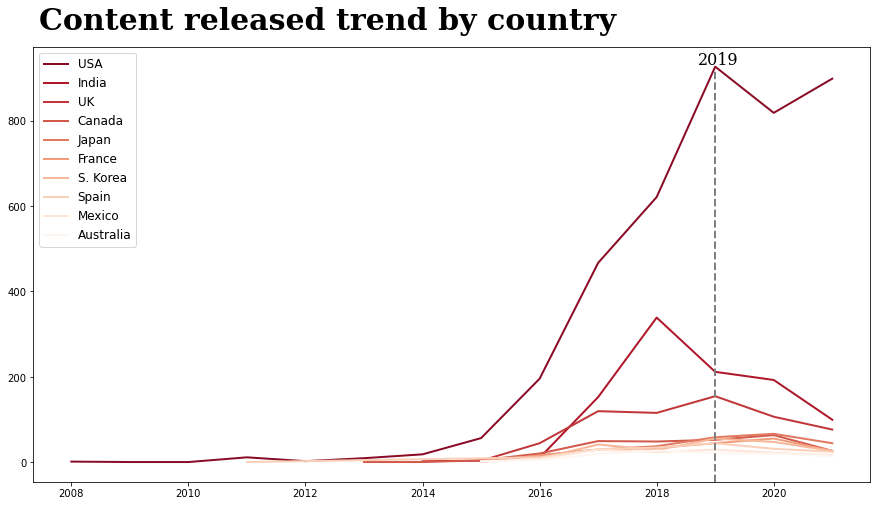

In [422]:
countries = countries_grouped['first_country'].tolist()
pal = sns.color_palette("RdGy", 20).as_hex()

fig, ax = plt.subplots(1,1,figsize = (15,8))
for country in countries:
    df1 = df[df['first_country'] == country]
    grouped = df1['year_added'].value_counts().reset_index()
    grouped = grouped.rename(columns = {'year_added' : "total_count", "index" : 'year_added'})
    grouped = grouped.sort_values("year_added")

    ax.plot(grouped['year_added'], grouped['total_count'], c=pal[countries.index(country)], label = country, lw=2)

ax.axvline(x=2019, ymin=0, ymax=0.95, c='grey', ls='--', lw=2)

fig.text(0.74, 0.85, '2019', fontsize=16, fontfamily='Serif') 
fig.text(0.13, 0.91, 'Content released trend by country', fontsize=30, fontweight='bold', fontfamily='Serif') 
ax.legend(loc = 'upper left', fontsize = 'large')
plt.show()

It seems all countries had reduced the number of films on Netflix since 2019.<br>

### Movies and TV Shows released trend by country
We double check do movies and TV shows decrease in the same time?

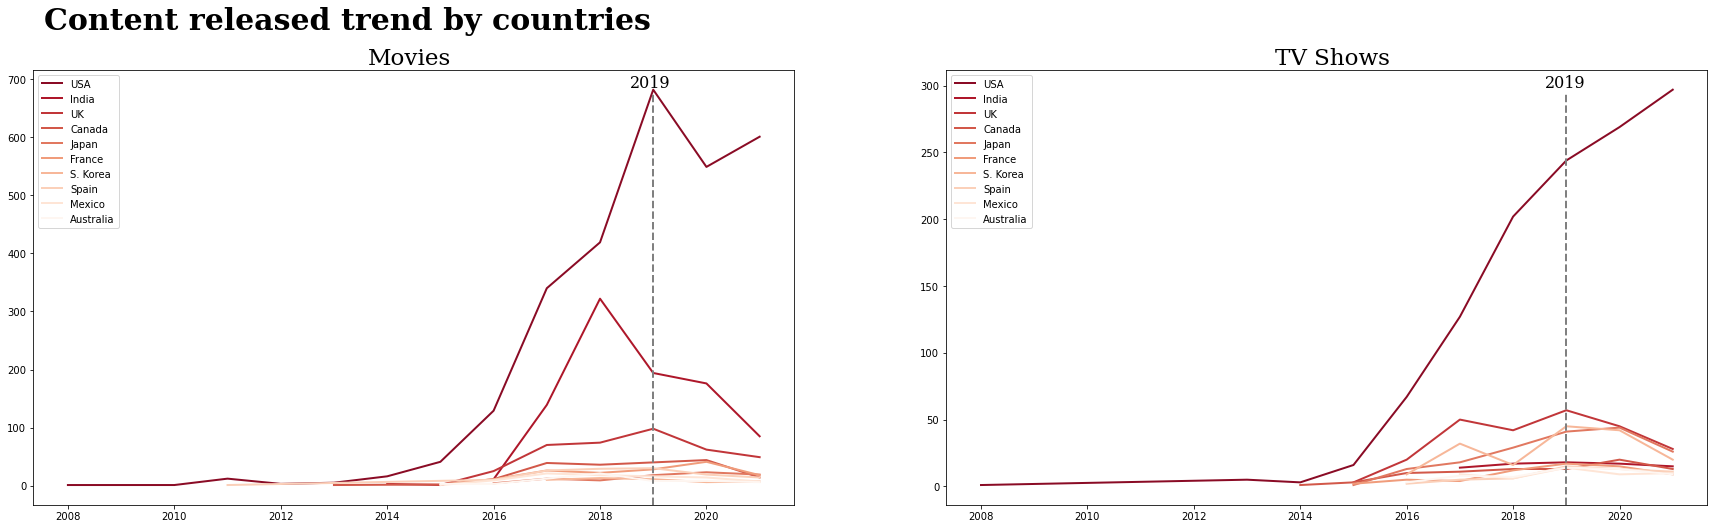

In [478]:
countries = countries_grouped['first_country'].tolist()
df_movie = df[df['type'] == 'Movie']
df_TV = df[df['type'] == 'TV Show']

fig, axes = plt.subplots(1,2,figsize = (30,8))

for country in countries:
    df1 = df_movie[df_movie['first_country'] == country]
    grouped = df1['year_added'].value_counts().reset_index()
    grouped = grouped.rename(columns = {'year_added' : "total_count", "index" : 'year_added'})
    grouped = grouped.sort_values("year_added")
    axes[0].plot(grouped['year_added'], grouped['total_count'], c=pal[countries.index(country)], label = country, lw=2)
    
for country in countries:
    df1 = df_TV[df_TV['first_country'] == country]
    grouped = df1['year_added'].value_counts().reset_index()
    grouped = grouped.rename(columns = {'year_added' : "total_count", "index" : 'year_added'})
    grouped = grouped.sort_values("year_added")
    axes[1].plot(grouped['year_added'], grouped['total_count'],c=pal[countries.index(country)], label = country,lw=2)
    
axes[0].axvline(x=2019, ymin=0, ymax=0.95, c='grey', ls='--', lw=2)
axes[1].axvline(x=2019, ymin=0, ymax=0.95, c='grey', ls='--', lw=2)

fig.text(0.13, 0.95, 'Content released trend by countries', fontsize=30, fontweight='bold', fontfamily='Serif') 
fig.text(0.28, 0.89, 'Movies', fontsize=23, fontfamily='Serif')
fig.text(0.70, 0.89, 'TV Shows', fontsize=23, fontfamily='Serif')

fig.text(0.825, 0.85, '2019', fontsize=16, fontfamily='Serif') 
fig.text(0.401, 0.85, '2019', fontsize=16, fontfamily='Serif')

axes[0].legend(loc = 'upper left', fontsize = 'medium')
axes[1].legend(loc = 'upper left', fontsize = 'medium')
plt.show()

Surprisingly, we find that TV shows in the USA actually increased after 2019.<br>
Maybe people spent more time at home due to COVID-19, so Netflix offers more TV shows on their stream media. 

### Movies and TV shows in top 10 contries
Here we check the detail changes in each top 10 countries.

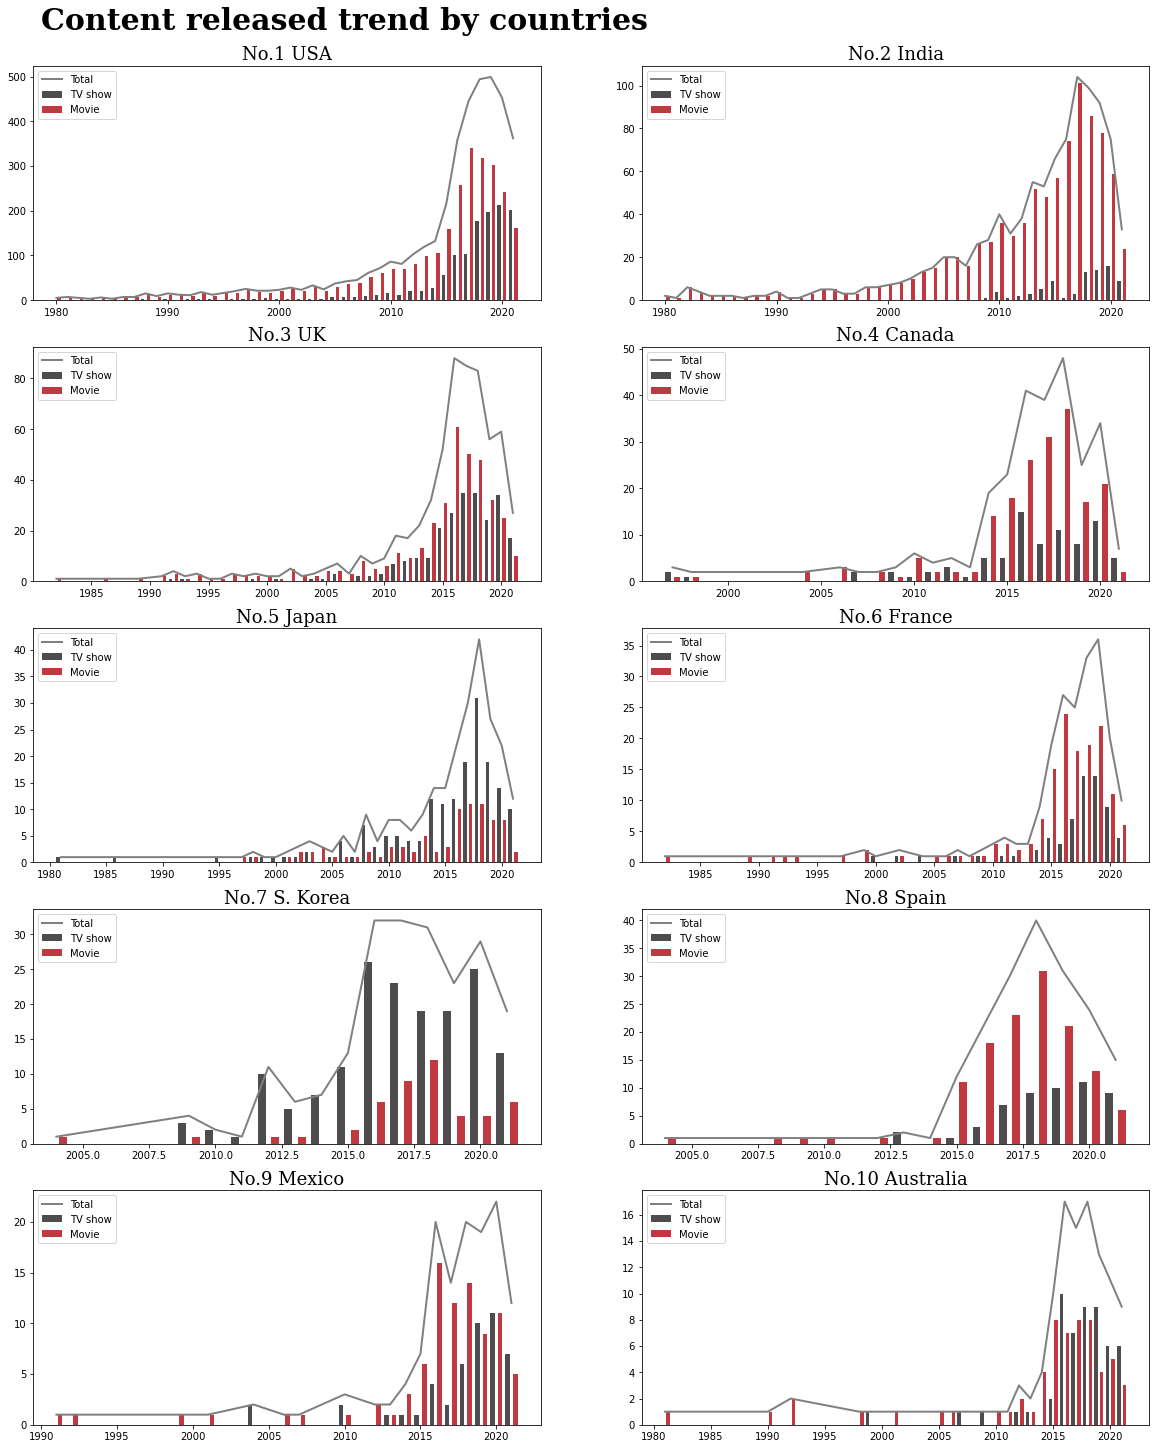

In [424]:
countries = countries_grouped['first_country'].tolist()
fig, axes = plt.subplots(5, 2, figsize = (20,25))
width = 0.5
col = 'release_year'
for i in range(len(countries)):
    x = i // 2
    y = i % 2
    
    df1 = df[df['first_country'] == countries[i]]
    df1 = df1[df1['release_year'] >= 1980]

    df_sortYear = df1[col].value_counts().reset_index()
    df_sortYear = df_sortYear.rename(columns = {col:'Total', 'index':col})
    df_sortYear = df_sortYear.sort_values(col)

    df_TVs = df1[df1['type'] == 'TV Show']
    df_Movies = df1[df1['type'] == 'Movie']

    df_sortYear_TVs = df_TVs[col].value_counts().reset_index()
    df_sortYear_TVs = df_sortYear_TVs.rename(columns = {col:'TV show', 'index':col})
    df_sortYear_TVs = df_sortYear_TVs.sort_values(col)

    df_sortYear_Movies = df_Movies[col].value_counts().reset_index()
    df_sortYear_Movies = df_sortYear_Movies.rename(columns = {col:'Movie', 'index':col})
    df_sortYear_Movies = df_sortYear_Movies.sort_values(col)

    df_total = pd.merge(df_sortYear, df_sortYear_TVs, how = 'left', left_on = 'release_year', right_on = 'release_year')
    df_total = pd.merge(df_total, df_sortYear_Movies, how = 'left', left_on = 'release_year', right_on = 'release_year')

    axes[x, y].plot(df_total[col], df_total['Total'], label = 'Total', linewidth = 2, color = 'grey')
    axes[x, y].bar(df_total[col] - width/2, df_total['TV show'], alpha = 0.8, width = 0.3, label = 'TV show', color = color_TV)
    axes[x, y].bar(df_total[col] + width/2, df_total['Movie'], alpha = 0.8, width = 0.3, label = 'Movie', color = color_movie)
    axes[x, y].set_title(f'No.{i+1} {countries[i]}', fontsize = 18, fontfamily='Serif')
    axes[x, y].legend(loc = 'upper left')

fig.text(0.13, 0.9, 'Content released trend by countries', fontsize=30, fontweight='bold', fontfamily='Serif') 
plt.show()


### Genre changes before and after 2019.
From the viewpoint of the numbers of movies and TV shows, we are also interested in genre changes.<br>
First, let's see movies genre changes in top 10 countries.

<ipython-input-425-449d1f193f0f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['Group'] = pd.cut(x = df[df['first_country'] == countries[i]].year_added, bins = [0,Diff_Years-1, 9999],labels = split_year)


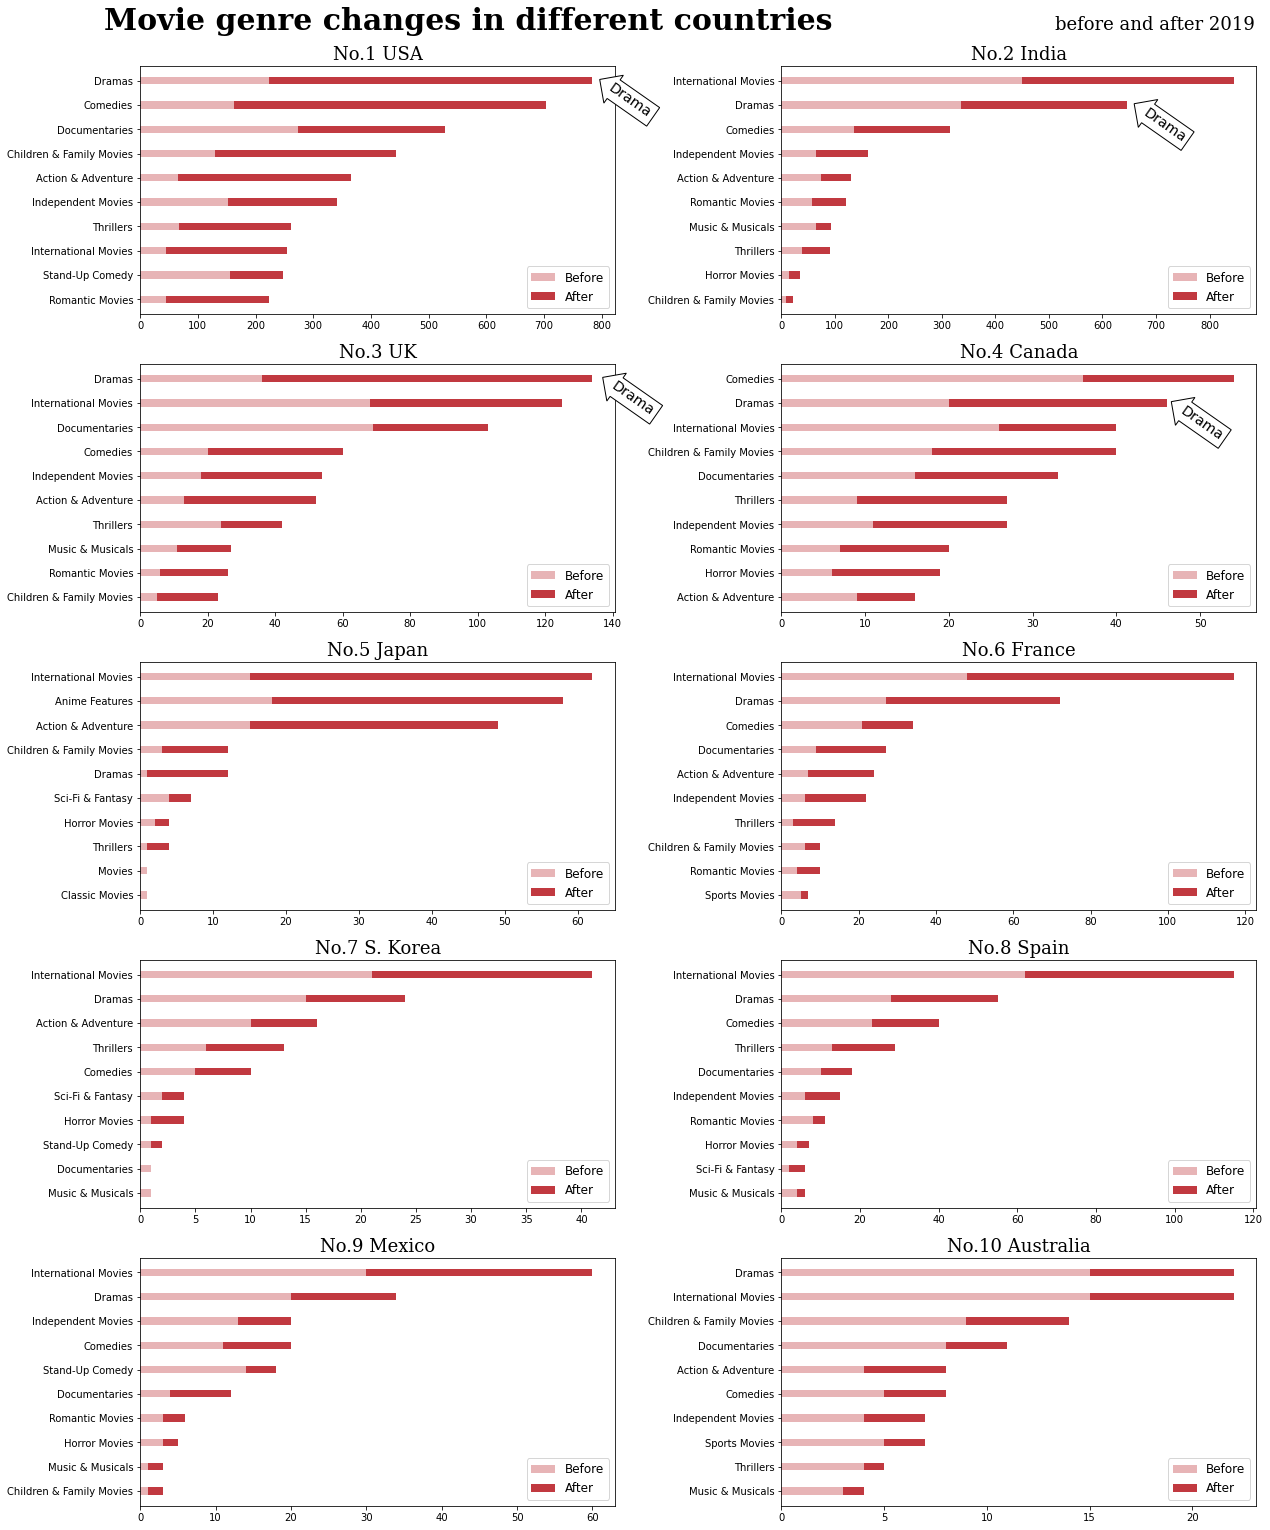

In [425]:
Diff_Years = 2019
countries = countries_grouped['first_country'].tolist()
split_year = ['Before', 'After']

df_temp = df[df['type'] == 'Movie']
fig, axes = plt.subplots(5, 2, figsize = (20,25))
for i in range(len(countries)):
    x = i // 2
    y = i % 2
    df_temp['Group'] = pd.cut(x = df[df['first_country'] == countries[i]].year_added, bins = [0,Diff_Years-1, 9999],labels = split_year)
    years_group = df_temp.groupby(['Group'])
    
    # Before Diff_Years dataframe
    before_years_group = years_group.get_group('Before')
    categories = ', '.join(before_years_group['listed_in']).split(', ')
    counter_dict = dict(Counter(categories))
    df_before = pd.DataFrame.from_dict(counter_dict, orient = 'index').rename(columns = {0: 'Before_count'})
    
    # After Diff_Years dataframe
    after_years_group = years_group.get_group('After')
    categories = ', '.join(after_years_group['listed_in']).split(', ')
    counter_dict = dict(Counter(categories))
    df_after = pd.DataFrame.from_dict(counter_dict, orient = 'index').rename(columns = {0: 'After_count'})
    
    # Merge two dataframe
    df_total = pd.merge(df_before, df_after, how = 'left', left_on = df_before.index, right_on = df_after.index).rename(columns = {'key_0': 'Genre'})
    df_total['Sum'] = df_total['Before_count'] + df_total['After_count']
    df_total = df_total.sort_values(['Sum'], ascending = False).head(10)[::-1]
    
    # Plot
    axes[x, y].barh(df_total['Genre'], df_total['Before_count'], height = 0.3,
            color = color_movie, alpha = 0.3, label = 'Before')
    axes[x, y].barh(df_total['Genre'], df_total['After_count'], height = 0.3, left = df_total['Before_count'],
            color = color_movie, alpha = 0.8, label = 'After')
    axes[x, y].set_title(f'No.{i+1} {countries[i]}', fontsize = 18, fontfamily='Serif')
    axes[x, y].legend(loc = 'lower right', fontsize = 'larger')
    axes[x, y].tick_params(axis='both', which='major', labelsize=10)

axes[0, 0].text(890, 7.5, "Drama",rotation = -35,va="baseline", ha="right", multialignment="left",bbox=dict(boxstyle='larrow', fc="w", ec="k"),size="x-large", color="black")
axes[0, 1].text(760, 6.5, "Drama",rotation = -35,va="baseline", ha="right", multialignment="left",bbox=dict(boxstyle='larrow', fc="w", ec="k"),size="x-large", color="black")
axes[1, 0].text(153, 7.5, "Drama",rotation = -35,va="baseline", ha="right", multialignment="left",bbox=dict(boxstyle='larrow', fc="w", ec="k"),size="x-large", color="black")
axes[1, 1].text(53, 6.5, "Drama",rotation = -35,va="baseline", ha="right", multialignment="left",bbox=dict(boxstyle='larrow', fc="w", ec="k"),size="x-large", color="black")

plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.35)

fig.text(0.1, 0.92, 'Movie genre changes in different countries', fontsize=30, fontweight='bold', fontfamily='Serif') 
fig.text(0.76, 0.92, 'before and after 2019', fontsize=18, fontfamily='Serif') 
 
plt.show()

From these plots, we observe that dramas movies increase after 2019 in USA, India, UK, and Canada.

Second, we check the genre changes in TV shows.

<ipython-input-426-286a3cb3a322>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['Group'] = pd.cut(x = df[df['first_country'] == countries[i]].year_added, bins = [0,Diff_Years-1, 9999],


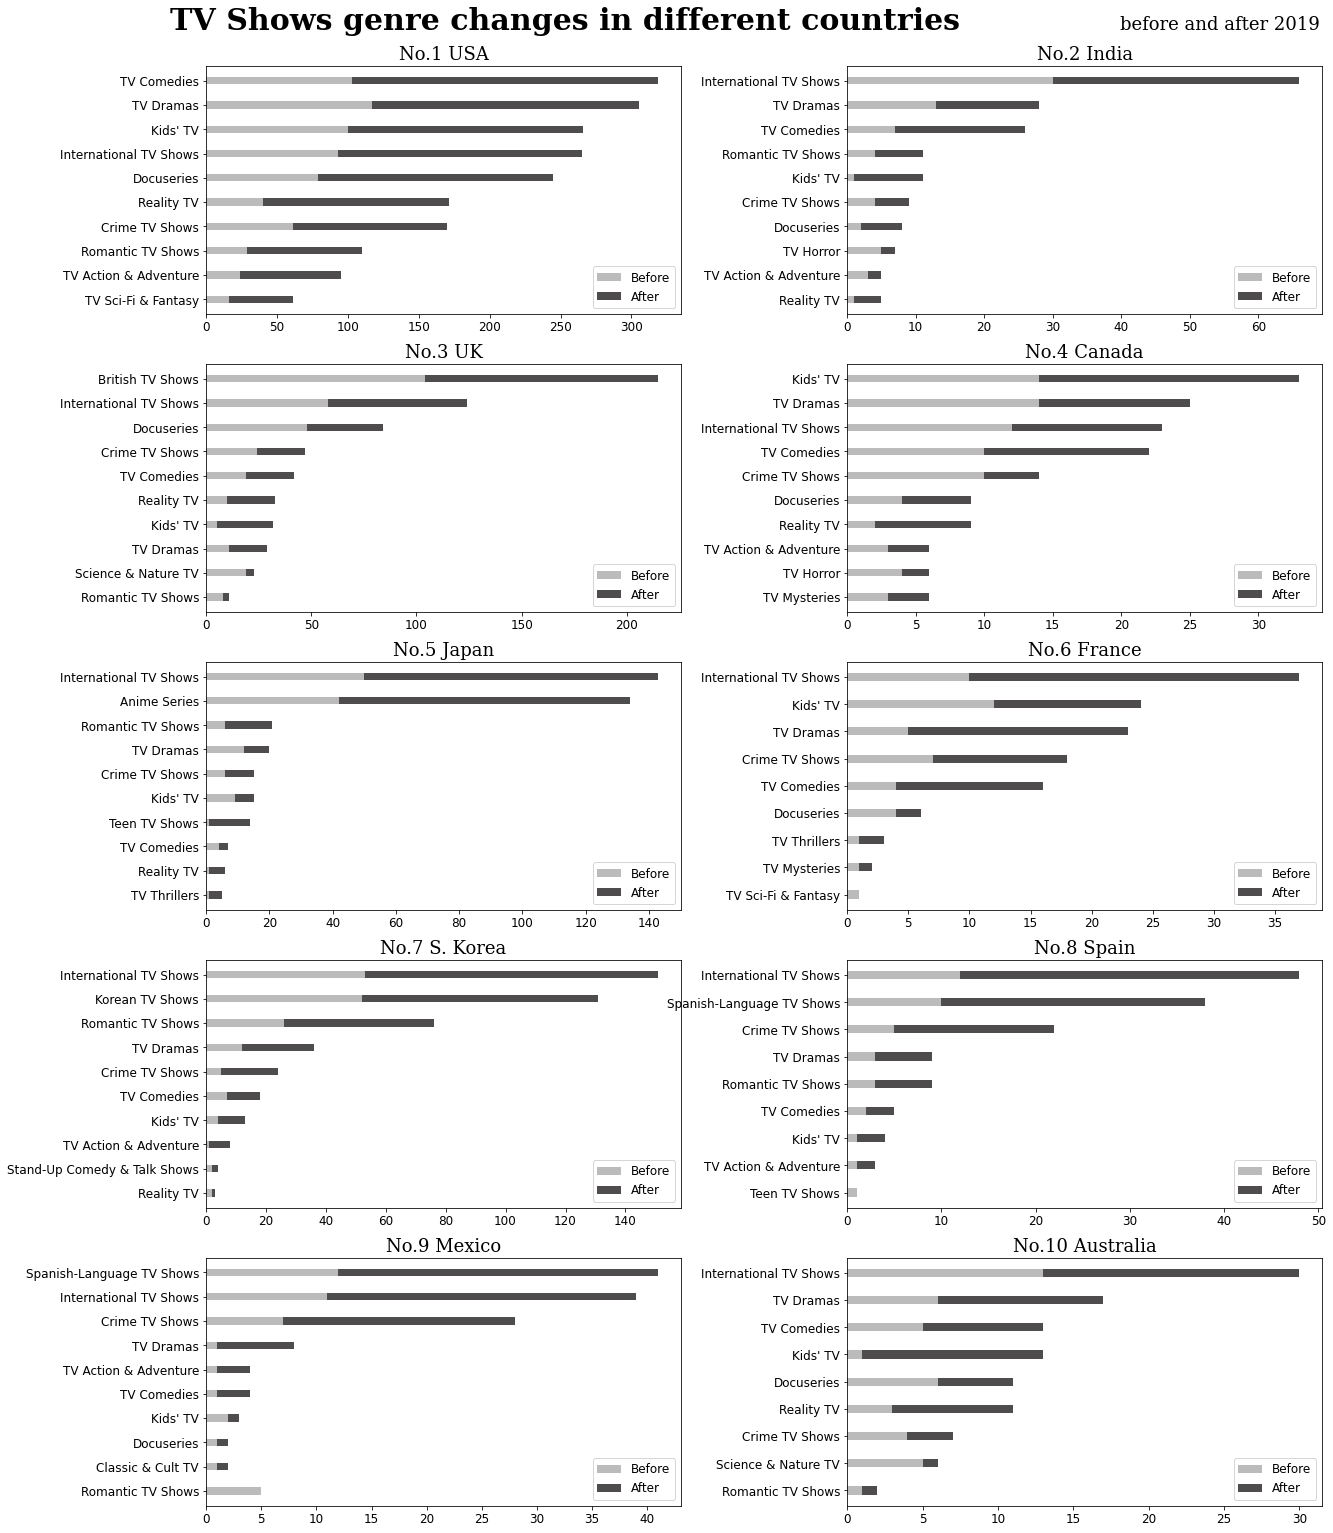

In [426]:
# TV Show genre change by country between 2019
df_temp = df[df['type'] == 'TV Show']
fig, axes = plt.subplots(5, 2, figsize = (20,25))
for i in range(len(countries)):
    x = i // 2
    y = i % 2
    df_temp['Group'] = pd.cut(x = df[df['first_country'] == countries[i]].year_added, bins = [0,Diff_Years-1, 9999],
                              labels = split_year)
    years_group = df_temp.groupby(['Group'])
    
    # Before Diff_Years dataframe

    before_years_group = years_group.get_group('Before')
    categories = ', '.join(before_years_group['listed_in']).split(', ')
    counter_dict = dict(Counter(categories))
    df_before = pd.DataFrame.from_dict(counter_dict, orient = 'index').rename(columns = {0: 'Before_count'})
    
    # After Diff_Years dataframe

    after_years_group = years_group.get_group('After')
    categories = ', '.join(after_years_group['listed_in']).split(', ')
    counter_dict = dict(Counter(categories))
    df_after = pd.DataFrame.from_dict(counter_dict, orient = 'index').rename(columns = {0: 'After_count'})
    
    # Merge two dataframe

    df_total = pd.merge(df_before, df_after, how = 'left', left_on = df_before.index, right_on = df_after.index).rename(columns = {'key_0': 'Genre'})
    df_total['Sum'] = df_total['Before_count'] + df_total['After_count']
    df_total = df_total.sort_values(['Sum'], ascending = False).head(10)[::-1]
    
    # Plot
    axes[x, y].barh(df_total['Genre'], df_total['Before_count'], height = 0.3,
            color = color_TV, alpha = 0.3, label = 'Before')
    axes[x, y].barh(df_total['Genre'], df_total['After_count'], height = 0.3, left = df_total['Before_count'],
            color = color_TV, alpha = 0.8, label = 'After')
    axes[x, y].set_title(f'No.{i+1} {countries[i]}', fontsize = 18, fontfamily='Serif')
    axes[x, y].legend(loc = 'lower right', fontsize = 'larger')
    axes[x, y].tick_params(axis='both', which='major', labelsize=12)
    
fig.text(0.1, 0.92, 'TV Shows genre changes in different countries', fontsize=30, fontweight='bold', fontfamily='Serif') 
fig.text(0.76, 0.92, 'before and after 2019', fontsize=18, fontfamily='Serif')  
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.35)
plt.show()

There is no specific TV shows' genre decreased after 2019 in top 10 countries.

---

# Thank you for reading! 